In [13]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-06 18:10:44--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-10-06 18:10:44 (90.2 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [59]:
import pandas as pd

df_raw = pd.read_csv('car_fuel_efficiency.csv')
df_filtered = df_raw[[
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]].copy()

In [60]:
df_filtered.shape

(9704, 5)

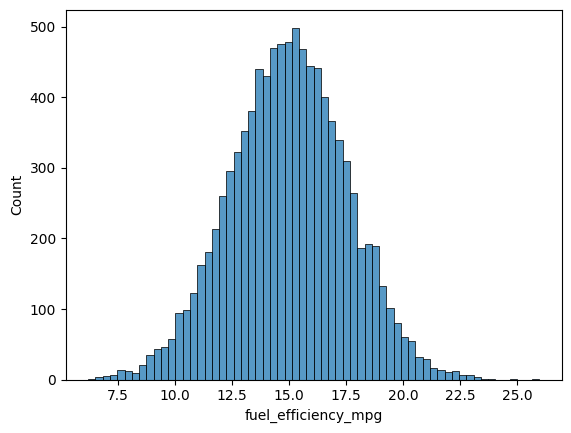

In [61]:
# Look at the fuel_efficiency_mpg variable. Does it have a long tail?   - No
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_filtered['fuel_efficiency_mpg'], kde=False)
plt.show()

In [62]:
columns_with_missing = df_filtered.columns[df_filtered.isnull().any()].tolist()
print('Question 1. Missing values:', *columns_with_missing)

Question 1. Missing values: horsepower


In [63]:
median_hp = df_filtered['horsepower'].median()
print(f'Question 2. Median for horse power: {median_hp}')

Question 2. Median for horse power: 149.0


In [64]:
from sklearn.model_selection import train_test_split

# Shuffle the dataset (the filtered one you created above), use seed 42
df_shuffled = df_filtered.sample(frac=1, random_state=42).reset_index(drop=True)
df_shuffled.reset_index(drop=True, inplace=True)

# Split your data in train/val/test sets, with 60%/20%/20% distribution.

# Split into train/val/test (60%/20%/20%)
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

# Reset indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Verify
print(f"Original dataset size: {len(df_filtered)}")
print(f"Training set size: {len(df_train)} ({len(df_train)/len(df_filtered)*100:.1f}%)")
print(f"Validation set size: {len(df_val)} ({len(df_val)/len(df_filtered)*100:.1f}%)")
print(f"Test set size: {len(df_test)} ({len(df_test)/len(df_filtered)*100:.1f}%)")

Original dataset size: 9704
Training set size: 5822 (60.0%)
Validation set size: 1941 (20.0%)
Test set size: 1941 (20.0%)


In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

feature_columns = ['engine_displacement', 'vehicle_weight', 'model_year', 'horsepower']
target_column = 'fuel_efficiency_mpg'

# OPTION 1: Fill missing horsepower values with 0
train_df_fill0 = train_df.copy()
val_df_fill0 = val_df.copy()

# Fill missing values in training set with 0
train_df_fill0['horsepower'] = train_df_fill0['horsepower'].fillna(0)
# Fill missing values in validation set with 0
val_df_fill0['horsepower'] = val_df_fill0['horsepower'].fillna(0)

# Prepare features and target for training
X_train_fill0 = train_df_fill0[feature_columns]
y_train_fill0 = train_df_fill0[target_column]

X_val_fill0 = val_df_fill0[feature_columns]
y_val_fill0 = val_df_fill0[target_column]

# Train linear regression model
model_fill0 = LinearRegression()
model_fill0.fit(X_train_fill0, y_train_fill0)

# Make predictions and calculate RMSE
y_pred_fill0 = model_fill0.predict(X_val_fill0)
rmse_fill0 = math.sqrt(mean_squared_error(y_val_fill0, y_pred_fill0))
rmse_fill0 = round(rmse_fill0, 2)

print(f"RMSE with horsepower filled with 0: {rmse_fill0}")

# OPTION 2: Fill missing horsepower values with mean (For computing the mean, use the training only!)
train_df_fillmean = train_df.copy()
val_df_fillmean = val_df.copy()

# Calculate mean from training set only
horsepower_mean = train_df_fillmean['horsepower'].mean()

# Fill missing values in training set with mean
train_df_fillmean['horsepower'] = train_df_fillmean['horsepower'].fillna(horsepower_mean)
# Fill missing values in validation set with the same mean
val_df_fillmean['horsepower'] = val_df_fillmean['horsepower'].fillna(horsepower_mean)

# Prepare features and target for training
X_train_fillmean = train_df_fillmean[feature_columns]
y_train_fillmean = train_df_fillmean[target_column]

X_val_fillmean = val_df_fillmean[feature_columns]
y_val_fillmean = val_df_fillmean[target_column]

# Train linear regression model
model_fillmean = LinearRegression()
model_fillmean.fit(X_train_fillmean, y_train_fillmean)

# Make predictions and calculate RMSE
y_pred_fillmean = model_fillmean.predict(X_val_fillmean)
rmse_fillmean = math.sqrt(mean_squared_error(y_val_fillmean, y_pred_fillmean))
rmse_fillmean = round(rmse_fillmean, 2)

print(f"RMSE with horsepower filled with mean: {rmse_fillmean}")

print('Question 3. Filling NAs:')
if rmse_fill0 < rmse_fillmean:
    print("Filling with 0 gives better RMSE")
else:
    print("Filling with mean gives better RMSE")

RMSE with horsepower filled with 0: 0.51
RMSE with horsepower filled with mean: 0.46
Question 3. Filling NAs:
Filling with mean gives better RMSE


In [68]:



# ===========================
# QUESTION 4
# ===========================

# Fill missing values with 0 (as instructed)
df_train_q4 = df_train.fillna(0)
df_val_q4 = df_val.fillna(0)

X_train_q4 = df_train_q4[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
y_train_q4 = df_train_q4['fuel_efficiency_mpg'].values

X_val_q4 = df_val_q4[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
y_val_q4 = df_val_q4['fuel_efficiency_mpg'].values

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_dict = {}

for r in r_values:
    model = Ridge(alpha=r, solver='cholesky')  # ensures consistent results
    model.fit(X_train_q4, y_train_q4)
    y_pred = model.predict(X_val_q4)
    rmse = np.sqrt(mean_squared_error(y_val_q4, y_pred))
    rmse_dict[r] = round(rmse, 2)

print("Question 4. Best regularization:")
for r, rmse in rmse_dict.items():
    print(f"r = {r}: RMSE = {rmse}")


Question 4. Best regularization:
r = 0: RMSE = 0.52
r = 0.01: RMSE = 0.52
r = 0.1: RMSE = 0.52
r = 1: RMSE = 0.52
r = 5: RMSE = 0.52
r = 10: RMSE = 0.52
r = 100: RMSE = 0.52


In [79]:
df = pd.read_csv('car_fuel_efficiency.csv')
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns].copy()

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    df_train, df_temp = train_test_split(df_shuffled, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

    #Fill the missing values with 0 and train a model without regularization.
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_train_filled = df_train.fillna(0)
    df_val_filled = df_val.fillna(0)
    
    X_train = df_train_filled[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
    y_train = df_train_filled['fuel_efficiency_mpg'].values
    
    X_val = df_val_filled[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
    y_val = df_val_filled['fuel_efficiency_mpg'].values
    
    # train a model without regularization
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
std_dev = np.std(rmse_scores)
std_dev_rounded = round(std_dev, 5)
print(f"Question 5. RMSE Standard Deviation: {std_dev_rounded}")

Question 5. RMSE Standard Deviation: 0.0065


In [83]:
df = pd.read_csv('car_fuel_efficiency.csv')
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns].copy()

seed = 9
df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Split into train/val/test (60%/20%/20%)
df_train, df_temp = train_test_split(df_shuffled, test_size=0.4, random_state=seed)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

# Combine train and validation datasets.
df_train_full = pd.concat([df_train, df_val]).reset_index(drop=True)

# Fill missing values with 0
df_train_full_filled = df_train_full.fillna(0)
df_test_filled = df_test.fillna(0)

X_train = df_train_full_filled[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
y_train = df_train_full_filled['fuel_efficiency_mpg'].values

X_test = df_test_filled[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']].values
y_test = df_test_filled['fuel_efficiency_mpg'].values

# Train model with r=0.001
model = Ridge(alpha=0.001, solver='cholesky')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rounded = round(rmse, 3)
print(f"Question 6. Evaluation on test: {rmse_rounded}")

Question 6. Evaluation on test: 0.532
